# Quinoa

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from helper import clean_trade_quantities

In [18]:
df_trade = pd.read_pickle('../data/df_trade_merged.pkl')
df_production = pd.read_pickle('../data/df_prod.pkl')

In [19]:
df_trade_quinoa = df_trade[df_trade['Item'] == 'Quinoa']
df_trade_quinoa.head(10)

,Importer,Exporter,Item,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
215,Afghanistan,Netherlands,Quinoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
847,Albania,France,Quinoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1005,Albania,Greece,Quinoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1208,Albania,Italy,Quinoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1363,Albania,Peru,Quinoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2437,Algeria,France,Quinoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3079,Algeria,Peru,Quinoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3341,Algeria,Spain,Quinoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5074,Argentina,Bolivia (Plurinational State of),Quinoa,0.0,0.0,0.0,0.0,0.0,2.0,3.0,...,113.0,12.0,108.0,243.0,321.0,259.0,132.0,70.0,44.0,67.0
5269,Argentina,Chile,Quinoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [46]:
df_quinoa_exporters = df_trade_quinoa.groupby(by='Exporter').sum().sort_values(by='2016', ascending=False)
df_quinoa_exporters = df_quinoa_exporters.reset_index().rename(columns={'Exporter': 'Area'})
df_quinoa_exporters = df_quinoa_exporters.set_index('Area')
df_quinoa_exporters.head(10)

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Area,,,,,,,,,,,,,,,,,,,,,
Peru,44.0,49.0,20.0,180.0,166.0,0.0,0.0,0.0,1.0,14.0,...,0.0,0.0,162.0,0.0,0.0,10748.0,18698.0,36744.0,43873.0,49850.0
Bolivia (Plurinational State of),538.0,1158.0,1492.0,1722.0,1797.0,1406.0,2038.0,1435.0,2123.0,2018.0,...,10455.0,10201.0,14424.0,15364.0,23151.0,27837.0,38131.0,33161.0,28466.0,26716.0
United States of America,0.0,0.0,0.0,53.0,95.0,68.0,93.0,86.0,52.0,122.0,...,0.0,0.0,0.0,0.0,7.0,3359.0,5446.0,12668.0,8396.0,5362.0
Netherlands,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1773.0,2343.0,1272.0,2592.0,3684.0
Canada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,...,0.0,0.0,0.0,0.0,0.0,29.0,244.0,1396.0,3179.0,2214.0
Ecuador,23.0,0.0,27.0,30.0,10.0,58.0,42.0,42.0,98.0,119.0,...,259.0,304.0,144.0,0.0,0.0,375.0,387.0,1270.0,1752.0,1835.0
Italy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,208.0,213.0,318.0,693.0,1675.0
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1088.0,1021.0,854.0,1153.0,1619.0
United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,86.0,324.0,1103.0,1858.0,1395.0


In [49]:
df_quinoa_production = df_production[(df_production['Item'] == 'Quinoa') &
                                     (df_production['Element'] == 'Production')]
df_quinoa_production = df_quinoa_production.sort_values(by='Y2016', ascending=False)
df_quinoa_production = df_quinoa_production.set_index('Area').drop(['Element', 'Item', 'Unit'], axis=1)
df_quinoa_production.head(10)

,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,...,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016
Area,,,,,,,,,,,,,,,,,,,,,
Peru,17157.0,16629.0,13773.0,16070.0,23688.0,28171.0,28413.0,28191.0,22267.0,30373.0,...,31824.0,29867.0,39397.0,41079.0,41182.0,44213.0,52129.0,114725.0,105666.0,79269.0
Bolivia (Plurinational State of),19129.0,19465.0,18814.0,23498.0,26366.0,20291.0,22498.0,23785.0,23299.0,24179.0,...,26601.0,27169.0,34156.0,36724.0,40943.0,50874.0,63075.0,67711.0,75449.0,65548.0
Ecuador,493.0,362.0,408.0,555.0,304.0,938.0,938.0,650.0,320.0,294.0,...,690.0,741.0,800.0,1833.0,2073.0,2323.0,2515.0,3711.0,12707.0,3903.0


In [50]:
df_prod_export = pd.concat([df_quinoa_production, df_quinoa_exporters], axis=1, join='inner')
df_prod_export.head()

,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Area,,,,,,,,,,,,,,,,,,,,,
Peru,17157.0,16629.0,13773.0,16070.0,23688.0,28171.0,28413.0,28191.0,22267.0,30373.0,...,0.0,0.0,162.0,0.0,0.0,10748.0,18698.0,36744.0,43873.0,49850.0
Bolivia (Plurinational State of),19129.0,19465.0,18814.0,23498.0,26366.0,20291.0,22498.0,23785.0,23299.0,24179.0,...,10455.0,10201.0,14424.0,15364.0,23151.0,27837.0,38131.0,33161.0,28466.0,26716.0
Ecuador,493.0,362.0,408.0,555.0,304.0,938.0,938.0,650.0,320.0,294.0,...,259.0,304.0,144.0,0.0,0.0,375.0,387.0,1270.0,1752.0,1835.0


In [61]:
df_prod_quinoa_countries = df_prod_export[['Y' + str(year) for year in range(1993, 2017)]]
df_prod_quinoa_countries.columns = [str(year) for year in range(1993, 2017)]
df_expo_quinoa_countries = df_prod_export[[str(year) for year in range(1993, 2017)]]
df_export_proportion = df_expo_quinoa_countries.divide(df_prod_quinoa_countries)
df_export_proportion

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Area,,,,,,,,,,,,,,,,,,,,,
Peru,0.002565,0.002947,0.001452,0.011201,0.007008,0.000000,0.000000,0.000000,0.000045,0.000461,...,0.000000,0.000000,0.004112,0.000000,0.000000,0.243096,0.358687,0.320279,0.415205,0.628871
Bolivia (Plurinational State of),0.028125,0.059491,0.079303,0.073283,0.068156,0.069292,0.090586,0.060332,0.091120,0.083461,...,0.393030,0.375465,0.422298,0.418364,0.565445,0.547175,0.604534,0.489743,0.377288,0.407579
Ecuador,0.046653,0.000000,0.066176,0.054054,0.032895,0.061834,0.044776,0.064615,0.306250,0.404762,...,0.375362,0.410256,0.180000,0.000000,0.000000,0.161429,0.153877,0.342226,0.137877,0.470151


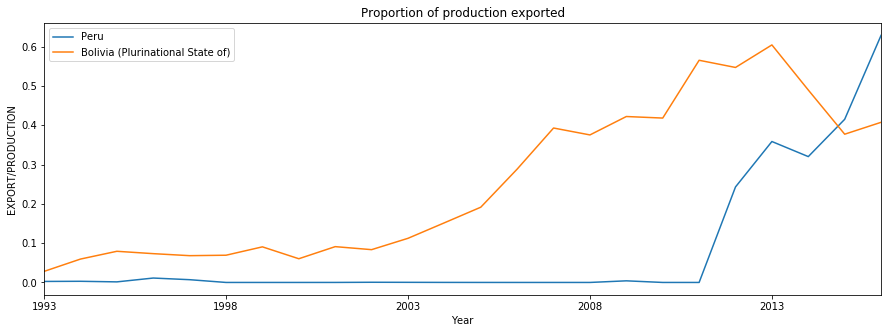

In [95]:
plt.figure(figsize=(15,5))
plt.title('Proportion of production exported')
plt.xlabel('Year')
plt.ylabel('EXPORT/PRODUCTION')
for label, col in df_export_proportion.transpose().iteritems():
    if label != 'Ecuador':
        ax = col.plot(label=label)
plt.legend()
plt.show()

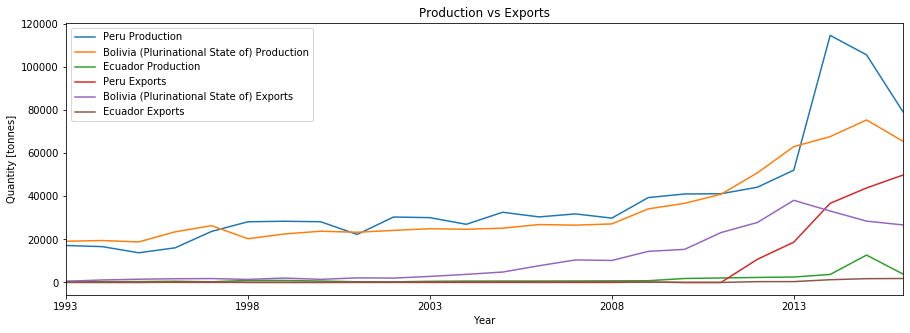

In [96]:
plt.figure(figsize=(15,5))
plt.title('Production vs Exports')
plt.xlabel('Year')
plt.ylabel('Quantity [tonnes]')
for label, col in df_quinoa_production.transpose().iteritems():
    col.plot(label=label + ' Production')
for label, col in df_expo_quinoa_countries.transpose().iteritems():
    col.plot(label=label + ' Exports')
plt.legend()
plt.show()

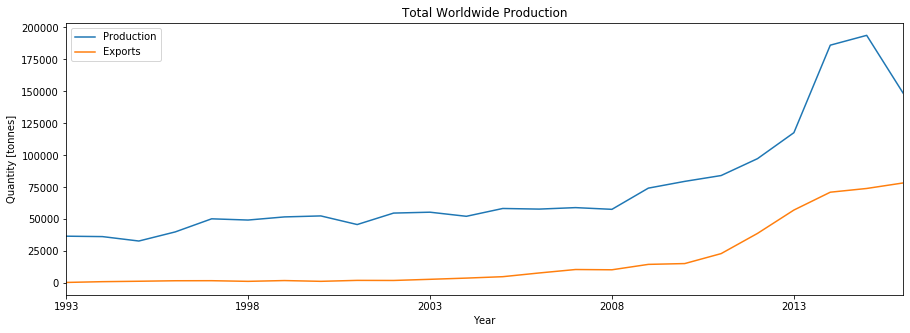

In [97]:
plt.figure(figsize=(15,5))
plt.title('Total Worldwide Production')
plt.xlabel('Year')
plt.ylabel('Quantity [tonnes]')
df_quinoa_production.sum().plot(label='Production')
df_expo_quinoa_countries.sum().plot(label='Exports')
plt.legend()
plt.show()

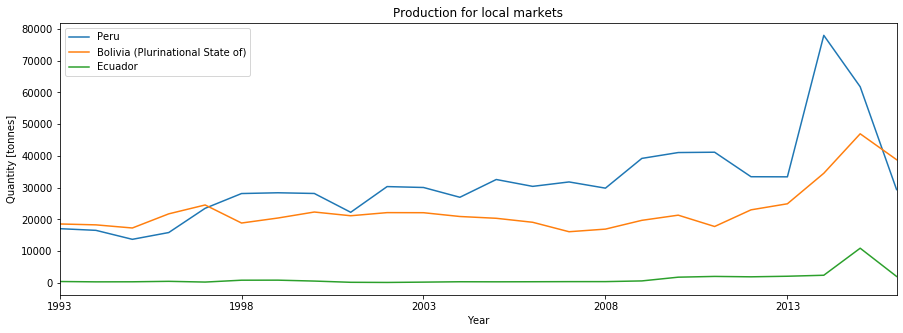

In [92]:
plt.figure(figsize=(15,5))
plt.title('Production for local markets')
plt.xlabel('Year')
plt.ylabel('Quantity [tonnes]')
for label, col in (df_prod_quinoa_countries - df_expo_quinoa_countries).transpose().iteritems():
    ax = col.plot(label=label)
plt.legend()
plt.show()

In [99]:
df_trade_quinoa.groupby(by='Importer').sum().sort_values(by='2016', ascending=False).head(20)

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Importer,,,,,,,,,,,,,,,,,,,,,
United States of America,245.0,413.0,502.0,514.0,805.0,600.0,1014.0,578.0,804.0,766.0,...,2744.0,4140.0,6501.0,7645.0,12165.0,23693.0,32286.0,37463.0,33985.0,31501.0
Canada,0.0,0.0,0.0,33.0,0.0,0.0,0.0,0.0,21.0,60.0,...,367.0,504.0,395.0,608.0,1438.0,7436.0,11534.0,18748.0,14889.0,12543.0
France,18.0,166.0,127.0,217.0,306.0,352.0,462.0,392.0,515.0,465.0,...,2344.0,1745.0,2541.0,2058.0,2953.0,3850.0,4740.0,4685.0,5545.0,7059.0
Netherlands,95.0,134.0,54.0,129.0,185.0,227.0,210.0,178.0,315.0,509.0,...,2345.0,1454.0,2177.0,1922.0,2471.0,2127.0,3358.0,4417.0,5689.0,6705.0
Germany,110.0,174.0,158.0,100.0,125.0,113.0,246.0,220.0,304.0,232.0,...,1027.0,1103.0,1074.0,1173.0,989.0,1700.0,3041.0,3809.0,5351.0,5705.0
United Kingdom,0.0,0.0,18.0,0.0,3.0,0.0,0.0,1.0,0.0,1.0,...,358.0,291.0,264.0,254.0,563.0,1368.0,2271.0,2975.0,3632.0,4895.0
Italy,0.0,0.0,0.0,0.0,7.0,7.0,0.0,35.0,22.0,24.0,...,24.0,54.0,41.0,122.0,57.0,1088.0,1299.0,2172.0,3652.0,4876.0
Spain,7.0,7.0,1.0,0.0,7.0,2.0,12.0,1.0,50.0,8.0,...,37.0,5.0,9.0,29.0,45.0,262.0,611.0,1118.0,1497.0,4270.0
Australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,85.0,125.0,221.0,253.0,528.0,1102.0,2400.0,3521.0,2745.0,2325.0


In [111]:
df_trade_quinoa.groupby(by='Exporter').sum().sort_values(by='2016', ascending=False).head(20)

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Exporter,,,,,,,,,,,,,,,,,,,,,
Peru,44.0,49.0,20.0,180.0,166.0,0.0,0.0,0.0,1.0,14.0,...,0.0,0.0,162.0,0.0,0.0,10748.0,18698.0,36744.0,43873.0,49850.0
Bolivia (Plurinational State of),538.0,1158.0,1492.0,1722.0,1797.0,1406.0,2038.0,1435.0,2123.0,2018.0,...,10455.0,10201.0,14424.0,15364.0,23151.0,27837.0,38131.0,33161.0,28466.0,26716.0
United States of America,0.0,0.0,0.0,53.0,95.0,68.0,93.0,86.0,52.0,122.0,...,0.0,0.0,0.0,0.0,7.0,3359.0,5446.0,12668.0,8396.0,5362.0
Netherlands,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1773.0,2343.0,1272.0,2592.0,3684.0
Canada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,...,0.0,0.0,0.0,0.0,0.0,29.0,244.0,1396.0,3179.0,2214.0
Ecuador,23.0,0.0,27.0,30.0,10.0,58.0,42.0,42.0,98.0,119.0,...,259.0,304.0,144.0,0.0,0.0,375.0,387.0,1270.0,1752.0,1835.0
Italy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,208.0,213.0,318.0,693.0,1675.0
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1088.0,1021.0,854.0,1153.0,1619.0
United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,86.0,324.0,1103.0,1858.0,1395.0


In [108]:
df_trade_simple = pd.read_pickle('../data/df_trade.pkl')
df_trade_values_quinoa = df_trade_simple[(df_trade_simple['Element'] == 'Import Value') & 
                                         (df_trade_simple['Item'] == 'Quinoa')]
df_trade_values_quinoa = df_trade_values_quinoa.groupby(by='Reporter Countries').sum().sort_values(by='Y2016', ascending=False)
df_trade_values_quinoa.head(20)

,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,...,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016
Reporter Countries,,,,,,,,,,,,,,,,,,,,,
United States of America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,40972.0,93127.0,156267.0,114532.0,89916.0
Canada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,17675.0,32087.0,54837.0,38874.0,31396.0
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11859.0,17862.0,29802.0,25466.0,18721.0
Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,992.0,5085.0,19440.0,22571.0,15816.0
Netherlands,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6284.0,11402.0,20758.0,16448.0,15097.0
Spain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,577.0,2252.0,5747.0,6221.0,9646.0
Italy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1867.0,4244.0,10574.0,12251.0,9065.0
United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2437.0,7038.0,14470.0,11578.0,8847.0
Australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3369.0,7804.0,19204.0,9563.0,6101.0


In [112]:
df_trade_values_quinoa = df_trade_simple[(df_trade_simple['Element'] == 'Export Value') & 
                                         (df_trade_simple['Item'] == 'Quinoa')]
df_trade_values_quinoa = df_trade_values_quinoa.groupby(by='Reporter Countries').sum().sort_values(by='Y2016', ascending=False)
df_trade_values_quinoa.head(20)

,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,...,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016
Reporter Countries,,,,,,,,,,,,,,,,,,,,,
Peru,65.0,71.0,4.0,251.0,226.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,30712.0,79357.0,196199.0,143539.0,103143.0
Bolivia (Plurinational State of),709.0,1440.0,1613.0,1864.0,2186.0,1884.0,2726.0,1802.0,2410.0,2328.0,...,13108.0,23028.0,43352.0,46531.0,72157.0,78912.0,153259.0,196637.0,107706.0,76065.0
United States of America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,13140.0,19299.0,31784.0,24809.0,20077.0
Netherlands,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4703.0,8492.0,8106.0,9098.0,11523.0
Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2967.0,7242.0,10673.0,7818.0,6228.0
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2697.0,5079.0,5332.0,5969.0,5947.0
Ecuador,0.0,0.0,38.0,42.0,11.0,86.0,53.0,67.0,139.0,170.0,...,400.0,557.0,411.0,0.0,0.0,0.0,402.0,5243.0,6001.0,4848.0
Italy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,528.0,792.0,740.0,1451.0,3923.0
Canada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,111.0,1004.0,2433.0,4199.0,3339.0


In [128]:
df_value = pd.read_pickle('../data/df_value.pkl')
df_value_quinoa = df_value[(df_value['Element'] == 'Net Production Value (constant 2004-2006 1000 I$)') &
                    (df_value['Item'] == 'Quinoa')].set_index('Area')

In [129]:
df_value_quinoa.head()

,Item,Element,Unit,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,...,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016
Area,,,,,,,,,,,,,,,,,,,,,
Bolivia (Plurinational State of),Quinoa,Net Production Value (constant 2004-2006 1000 I$),1000 Int. $,11973.075041,12203.483080,11776.629107,14787.435436,16647.327519,12744.453845,14159.938255,...,16715.190426,16950.492593,21472.586817,23082.995945,25148.049748,31894.991739,39652.954957,42559.898480,47552.750124,41164.248686
Ecuador,Quinoa,Net Production Value (constant 2004-2006 1000 I$),1000 Int. $,298.099956,209.573302,233.253537,338.104712,156.147596,565.228488,575.229677,...,423.211604,459.409456,492.187546,1436.302433,1599.300594,1764.635228,1891.323967,2368.475127,8173.179962,2492.455436
Peru,Quinoa,Net Production Value (constant 2004-2006 1000 I$),1000 Int. $,10819.996022,10513.507972,8573.922544,10016.029474,15014.043022,17875.028314,18049.242574,...,20320.480334,19013.228146,25033.298686,26047.935441,26075.420386,27948.640505,32756.281356,73145.599204,67300.388162,50267.915499


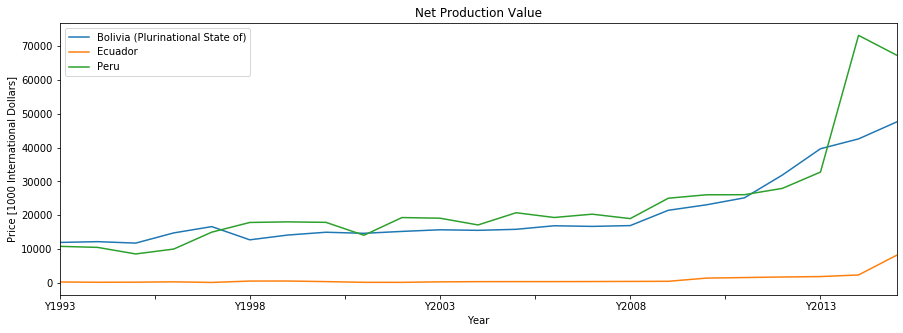

In [130]:
plt.figure(figsize=(15,5))
plt.title('Net Production Value')
plt.xlabel('Year')
plt.ylabel('Price [1000 International Dollars]')
for label, col in df_value_quinoa[['Y' + str(y) for y in range(1993, 2016)]].transpose().iteritems():
    ax = col.plot(label=label)
plt.legend()
plt.show()